In [ ]:
%matplotlib inline


# Regresión Logística

Sobre el dataset definido se toma el 20% de los ejemplos para prueba, y se muestran los efectos de la variación del parámetro de regularización C. 
Al aplicar escalado (minmax) mejoró levemente el Score. 
De este dataset se excluyeron los datos categóricos.


Automatically created module for IPython interactive environment
[[0.   0.2  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.93 0.85]
 [0.   0.25 0.   1.   0.   0.6  0.2  0.2  0.33 0.33 0.17 0.46 0.11]
 [0.   0.16 0.   1.   0.   0.4  0.6  0.   0.   0.5  0.   0.17 0.85]
 [0.   0.24 0.   1.   1.   0.2  0.8  0.   0.17 0.33 0.   0.6  0.85]
 [0.   0.1  0.   1.   0.   1.   0.   0.   0.   0.   0.   0.5  0.85]
 [0.   0.29 0.   1.   0.   0.8  0.2  0.   0.   0.   0.   0.53 0.85]
 [0.   0.12 0.   1.   0.   1.   0.   0.   0.   0.   0.   0.48 0.22]
 [0.   0.18 0.   0.   0.   0.8  0.2  0.   0.17 0.17 0.   0.91 0.85]
 [1.   0.14 0.   0.   0.   0.8  0.   0.2  0.   0.17 0.17 0.91 0.85]
 [0.   0.16 0.   0.   1.   0.6  0.2  0.2  0.   0.33 0.   0.94 0.85]
 [0.   0.14 0.   1.   0.   0.6  0.2  0.2  0.   0.33 0.17 0.18 0.85]]
Calculando ...
C=0.025 Score=0.548
C=0.067 Score=0.859
C=0.180 Score=0.874
C=0.483 Score=0.867
C=1.295 Score=0.874
C=3.474 Score=0.874
C=9.319 Score=0.874
C=25.000 Score=0.874
C=67.067 S

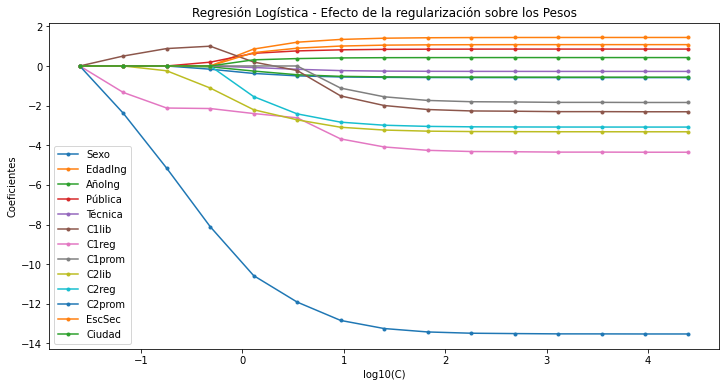

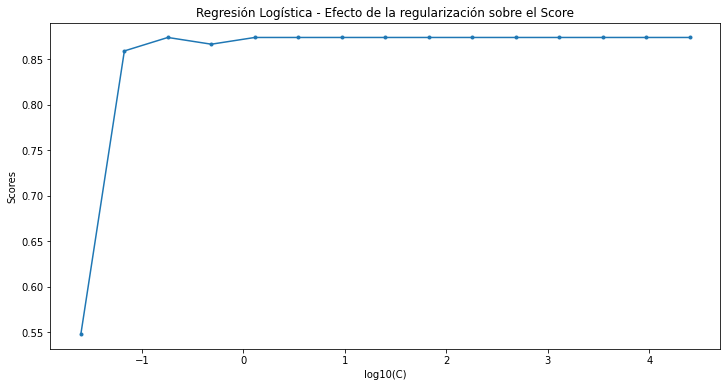

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import sys
from time import time
from numpy import genfromtxt
from sklearn import linear_model
from sklearn import preprocessing
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.svm import l1_min_c
from sklearn.preprocessing import MinMaxScaler

# np.savetxt('myfile.csv', X, delimiter=',')

#'Sexo',	'EdadIng',	'AñoIng',	'Pública',	'Técnica',	'C1lib',	'C1reg',	'C1prom',	'C2lib',	'C2reg',	'C2prom', 'Abandona?'
#Columnas 0 a 13 (excluyendo 3 y 6), características y resultado esperado
ds_floats = genfromtxt('dataset-sinnulos-completo.csv', dtype=float, delimiter=';', usecols = (0,1,2,4,5,7,8,9,10,11,12,13), skip_header=True,encoding='latin-1')

#'NomEscSec',	'CiudadAlu'
#Columnas 3 y 6, características categóricas
ds_strs = genfromtxt('dataset-sinnulos-completo.csv', dtype=str,  delimiter=';', usecols = (3,6),  skip_header=True, encoding='latin-1')
#toma las primeras 11 (0 a 10) columnas (no incluye 11)
#print(ds_strs[:11]) 

enc = preprocessing.OrdinalEncoder()
#X_ciudad_scaled = enc.fit_transform(ds_strs.reshape(-1,1))
X_esc_y_ciudad = enc.fit_transform(ds_strs)

#enc = preprocessing.OneHotEncoder()
#X_esc_y_ciudad = enc.fit_transform(ds_strs).toarray()
#np.set_printoptions(precision=2, suppress=True, linewidth=100, threshold=sys.maxsize)
#print(enc.get_feature_names())


X = ds_floats[:,:11]
#se agregan las doc columnas categorizadas
X = np.c_[X, X_esc_y_ciudad] 
y = ds_floats[:,11]

#np.set_printoptions(precision=2, suppress=True, linewidth=100)
#print(X[:11,:]) 

min_max_scaler = preprocessing.MinMaxScaler()
#aux=(X[:,1])
#X1minmax = min_max_scaler.fit_transform(aux.reshape(-1,1))
#X[:,1]= X_train_minmax[:,0]
X_scaled = min_max_scaler.fit_transform(X)
np.set_printoptions(precision=2, suppress=True, linewidth=1000)
print(X_scaled[:11,:]) #muestra primeras 10 filas


#particiona el dataset, reservando el 20% para prueba 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

print("Calculando ...")
start = time()
# l1_min_c, obtiene el valor min de C para l1 con liblinear, 
# tal que al menos un coef sea mayor que cero.
# np.logspace(2, 6, 15) genera 15 números que van de 1e0 a 1e6 
cs = l1_min_c(X_train, y_train, loss='log') * np.logspace(0, 6, 15)
clf = linear_model.LogisticRegression(penalty='l1', max_iter=100000, solver='liblinear')
#clf.fit(X_train, y_train)
#score = clf.score(X_test, y_test)
#print(score)

coefs_ = []
scores = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    coefs_.append(clf.coef_.ravel().copy())
    scores.append(score)
    print("C=%0.3f Score=%0.3f" %(c,score))

print("Tardó %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.figure(1,figsize=(12,6))
plt.plot(np.log10(cs), coefs_, marker='.')
ymin, ymax = plt.ylim()
plt.xlabel('log10(C)')
plt.ylabel('Coeficientes')
plt.title('Regresión Logística - Efecto de la regularización sobre los Pesos')
plt.axis('tight')
plt.legend(('Sexo',	'EdadIng',	'AñoIng',	'Pública',	'Técnica',	'C1lib',	'C1reg',	'C1prom',	'C2lib',	'C2reg',	'C2prom', 'EscSec', 'Ciudad'), loc="best", fontsize='medium')
plt.show()
print(" ")

plt.figure(2,figsize=(12,6))
plt.plot(np.log10(cs), scores, marker='.')
ymin, ymax = plt.ylim()
plt.xlabel('log10(C)')
plt.ylabel('Scores')
plt.title('Regresión Logística - Efecto de la regularización sobre el Score')
plt.axis('tight')

plt.show()
